In [1]:
!pip install pandas
!pip install numpy
!pip install pycaret
import pandas as pd
import numpy as np 
from pycaret.classification import *

In [2]:
Train = pd.read_csv('Train_clean.csv')
Test = pd.read_csv('Test_value_clean.csv')

In [3]:
Train = Train.drop(Train.columns[[0,1]],axis=1)
Test = Test.drop(Test.columns[[0,1]],axis=1)

In [4]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 59400 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              59400 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59400 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [5]:
Test.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0.0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321.0,True,GeoData Consultants Ltd,Parastatal,Other,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0.0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300.0,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,Government Of Tanzania,1567,DWE,34.767863,-5.004344,Puma Secondary,0.0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500.0,True,GeoData Consultants Ltd,VWC,Other,True,2010,other,other,other,vwc,user group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0.0,Ruvuma and Southern Coast,Kipindimbi,Lindi,8,43,Liwale,Mkutano,250.0,True,GeoData Consultants Ltd,VWC,Other,True,1987,other,other,other,vwc,user group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,62.5,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0.0,Ruvuma and Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60.0,True,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [6]:
Train_data = Train.iloc[:500:,:]

In [7]:
Train_data

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,50.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109.0,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,3/6/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280.0,True,GeoData Consultants Ltd,Other,Other,True,2010,gravity,gravity,gravity,wug,user group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2/25/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250.0,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,1/28/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma and Southern Coast,Mahakamani,Mtwara,9,63,Nanyumbu,Nanyumbu,58.0,True,GeoData Consultants Ltd,VWC,Other,True,1986,submersible,submersible,submersible,vwc,user group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,7/13/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,8,1,Karagwe,Nyakasimbi,0.0,True,GeoData Consultants Ltd,VWC,Other,True,1998,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
5,9944,20.0,3/13/2011,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,Pangani,Moa/Mwereme,Tanga,4,8,Mkinga,Moa,1.0,True,GeoData Consultants Ltd,VWC,Zingibali,True,2009,submersible,submersible,submersible,vwc,user group,pay per bucket,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional
6,19816,0.0,10/1/2012,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,Internal,Ishinabulandi,Shinyanga,17,3,Shinyanga Rural,Samuye,0.0,True,GeoData Consultants Ltd,VWC,Other,True,1997,swn 80,swn 80,handpump,vwc,user group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
7,54551,0.0,10/9/2012,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,0,Lake Tanganyika,Nyawishi Center,Shinyanga,17,3,Kahama,Chambo,0.0,True,GeoData Consultants Ltd,VWC,Other,True,1997,nira tanira,nira tanira,handpump,wug,user group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
8,53934,0.0,11/3/2012,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,Lake Tanganyika,Imalauduki,Tabora,14,6,Tabora Urban,Itetemia,0.0,True,GeoData Consultants Ltd,VWC,Other,True,1996,india mark ii,india mark ii,handpump,vwc,user group,never pay,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
9,46144,0.0,8/3/2011,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,0,Lake Victoria,Mkonomre,Kagera,8,1,Karagwe,Kaisho,0.0,True,GeoData Consultants Ltd,VWC,Other,True,1998,nira tanira,nira tanira,handpump,vwc,user group,never pay,never pay,soft,good,enough,enough,shallow we

In [8]:
clf1 = setup(Train_data, target = 'status_group', session_id=123, log_experiment=True, experiment_name='pump')

,Description,Value
0,session_id,123
1,Target,status_group
2,Target Type,Multiclass
3,Label Encoded,"functional: 0, functional needs repair: 1, non functional: 2"
4,Original Data,"(500, 41)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,32
8,Ordinal Features,False
9,High Cardinality Features,False


In [9]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6447,0.7236,0.4812,0.5962,0.6053,0.3481,0.3716,0.2340
et,Extra Trees Classifier,0.6445,0.7282,0.5032,0.6182,0.6224,0.3654,0.3744,0.2100
gbc,Gradient Boosting Classifier,0.6074,0.7212,0.4655,0.5822,0.5786,0.2875,0.3026,0.9960
lightgbm,Light Gradient Boosting Machine,0.6017,0.7195,0.4585,0.5776,0.5786,0.2925,0.3027,0.5590
dt,Decision Tree Classifier,0.5789,0.6485,0.4723,0.5897,0.5750,0.2834,0.2882,0.0290
ada,Ada Boost Classifier,0.5733,0.6067,0.4495,0.5657,0.5563,0.2567,0.2661,0.1580
lr,Logistic Regression,0.5443,0.6082,0.4006,0.4872,0.5075,0.1663,0.1754,4.4120
nb,Naive Bayes,0.5359,0.6766,0.4591,0.5579,0.5346,0.2284,0.2341,0.0240
ridge,Ridge Classifier,0.5243,0.0000,0.3863,0.4677,0.4900,0.1312,0.1375,0.2050
lda,Linear Discriminant Analysis,0.4955,0.6035,0.4267,0.5069,0.4935,0.1573,0.1597,0.4600


In [11]:
rf = create_model('rf')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6857,0.7477,0.4915,0.6799,0.6472,0.4059,0.4588
1,0.7143,0.8158,0.5917,0.6984,0.6986,0.4964,0.5021
2,0.6000,0.8366,0.4370,0.5469,0.5476,0.2542,0.2869
3,0.6286,0.7467,0.4608,0.5581,0.5794,0.3137,0.3364
4,0.5714,0.6955,0.4258,0.5048,0.5357,0.2222,0.2276
5,0.5143,0.6678,0.3950,0.4651,0.4855,0.1463,0.1494
6,0.6000,0.5727,0.4454,0.5412,0.5619,0.2643,0.2784
7,0.8000,0.7817,0.5994,0.7129,0.7519,0.6354,0.6544
8,0.6857,0.7058,0.5042,0.6545,0.6397,0.4140,0.4673
9,0.6471,0.6657,0.4608,0.6007,0.6060,0.3289,0.3548


In [13]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6000,0.7290,0.4327,0.5727,0.5778,0.2665,0.2752
1,0.7143,0.7875,0.5917,0.6984,0.6986,0.4964,0.5021
2,0.7429,0.8603,0.6155,0.7689,0.7255,0.5381,0.5504
3,0.6857,0.7906,0.5084,0.6081,0.6403,0.4245,0.4413
4,0.6857,0.7083,0.6359,0.6854,0.6828,0.4562,0.4583
5,0.5429,0.6892,0.4188,0.5035,0.5179,0.2113,0.2150
6,0.5714,0.5799,0.4300,0.5581,0.5635,0.2585,0.2597
7,0.6571,0.7717,0.4888,0.5971,0.6247,0.3869,0.3930
8,0.6857,0.7064,0.5084,0.6636,0.6554,0.4279,0.4572
9,0.5588,0.6590,0.4020,0.5259,0.5375,0.1879,0.1921


In [14]:
gbc = create_model('gbc')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6571,0.7836,0.4719,0.6464,0.6297,0.3675,0.3934
1,0.6286,0.8041,0.5245,0.6208,0.6108,0.3396,0.3504
2,0.5714,0.7633,0.4258,0.5111,0.5359,0.2152,0.2238
3,0.6857,0.7083,0.5637,0.7119,0.6663,0.4444,0.4769
4,0.6000,0.6798,0.5091,0.6344,0.5902,0.2878,0.2913
5,0.5714,0.7261,0.4342,0.5198,0.5442,0.2402,0.2431
6,0.5429,0.5846,0.4062,0.4957,0.5174,0.1825,0.1854
7,0.7143,0.8129,0.5280,0.6511,0.6671,0.4721,0.5062
8,0.5143,0.6878,0.3739,0.4651,0.4676,0.0944,0.1065
9,0.5882,0.6616,0.4174,0.5662,0.5563,0.2310,0.2491


In [15]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [26]:
ada = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6286,0.6326,0.4471,0.6782,0.6038,0.3367,0.3745
1,0.6571,0.6053,0.4846,0.6669,0.6501,0.4101,0.4199
2,0.7143,0.6981,0.5917,0.7455,0.6963,0.4845,0.5008
3,0.4857,0.4474,0.3585,0.4812,0.4814,0.1226,0.1233
4,0.4857,0.5993,0.4307,0.4940,0.4810,0.1127,0.1147
5,0.4286,0.5421,0.3277,0.4044,0.4125,0.0141,0.0143
6,0.4857,0.6080,0.4265,0.4885,0.4866,0.1334,0.1336
7,0.7429,0.7493,0.5560,0.6576,0.6973,0.5333,0.5462
8,0.4571,0.5578,0.3901,0.4230,0.4316,0.0486,0.0503
9,0.6471,0.6271,0.4818,0.6172,0.6220,0.3713,0.3830


In [27]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6286,0.7342,0.4523,0.6073,0.6037,0.3168,0.3324
1,0.6571,0.8312,0.5441,0.6539,0.6357,0.3878,0.4063
2,0.6857,0.8346,0.5805,0.6803,0.6752,0.4554,0.4603
3,0.6000,0.7490,0.4412,0.5757,0.5733,0.2857,0.2994
4,0.5429,0.6222,0.4062,0.5102,0.5260,0.2011,0.2021
5,0.4857,0.6838,0.3796,0.4629,0.4598,0.1358,0.1419
6,0.6000,0.6253,0.4454,0.5654,0.5717,0.2751,0.2885
7,0.6571,0.7455,0.4930,0.5823,0.6175,0.3805,0.3889
8,0.5714,0.6620,0.4216,0.5545,0.5490,0.2347,0.2459
9,0.5882,0.7067,0.4216,0.5837,0.5735,0.2516,0.2609


In [28]:
models(type='ensemble').index.tolist()

['rf', 'ada', 'gbc', 'et', 'lightgbm']

In [29]:
ensembled_models = compare_models( models(type='ensemble').index.tolist(), fold = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.6648,0.7467,0.5214,0.6469,0.6416,0.4002,0.4132,0.1967
rf,Random Forest Classifier,0.6275,0.7408,0.4842,0.6277,0.5975,0.3243,0.3440,0.2333
gbc,Gradient Boosting Classifier,0.6132,0.7542,0.4794,0.6056,0.5874,0.3042,0.3204,0.7633
ada,Ada Boost Classifier,0.5960,0.6248,0.4793,0.5864,0.5781,0.2856,0.2929,0.1567
lightgbm,Light Gradient Boosting Machine,0.5960,0.7256,0.4632,0.5834,0.5766,0.2891,0.3009,0.4833


In [30]:
tuned_et = tune_model(et)
tuned_rf = tune_model(rf)
tuned_gbc = tune_model(gbc)
tuned_ada = tune_model(ada)
tuned_lightgbm = tune_model(lightgbm)



,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6571,0.7110,0.5634,0.6636,0.6467,0.3824,0.3954
1,0.7429,0.7962,0.5560,0.6576,0.6973,0.5333,0.5462
2,0.6571,0.7805,0.5609,0.6874,0.6439,0.3948,0.4006
3,0.6286,0.7260,0.5245,0.6272,0.6147,0.3491,0.3607
4,0.5714,0.6330,0.4937,0.5679,0.5638,0.2543,0.2559
5,0.6571,0.7987,0.5567,0.6524,0.6526,0.4142,0.4160
6,0.6571,0.6739,0.4930,0.5864,0.6180,0.3750,0.3862
7,0.6000,0.7685,0.4454,0.5609,0.5794,0.2980,0.3000
8,0.6000,0.6409,0.4454,0.5945,0.5824,0.2857,0.2994
9,0.6176,0.7061,0.4538,0.5980,0.6075,0.3210,0.3216


In [31]:
bagged_rf = ensemble_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6571,0.7451,0.4693,0.6628,0.6141,0.3498,0.4104
1,0.6857,0.8205,0.5679,0.7121,0.6655,0.4330,0.4476
2,0.6571,0.8499,0.4804,0.6100,0.6049,0.3607,0.4072
3,0.6571,0.7262,0.4846,0.5834,0.6104,0.3694,0.3891
4,0.5714,0.6479,0.4216,0.5024,0.5312,0.2152,0.2238
5,0.5429,0.6417,0.4188,0.4906,0.5095,0.2000,0.2060
6,0.6000,0.5699,0.4454,0.5412,0.5619,0.2643,0.2784
7,0.8000,0.7995,0.5994,0.7129,0.7519,0.6354,0.6544
8,0.5714,0.6926,0.4090,0.6590,0.5085,0.1985,0.2753
9,0.6471,0.6867,0.4524,0.6467,0.5837,0.3154,0.3986


In [32]:
boosted_rf = ensemble_model(rf, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6571,0.7360,0.4719,0.6464,0.6297,0.3675,0.3934
1,0.6286,0.8016,0.4608,0.5581,0.5794,0.3137,0.3364
2,0.6000,0.8311,0.4412,0.5379,0.5557,0.2609,0.2798
3,0.6571,0.7447,0.4846,0.5773,0.6107,0.3722,0.3869
4,0.5143,0.6789,0.3824,0.4671,0.4888,0.1314,0.1335
5,0.6000,0.6426,0.4538,0.5479,0.5727,0.2878,0.2913
6,0.6286,0.6171,0.4692,0.6007,0.6093,0.3425,0.3493
7,0.7714,0.8108,0.5798,0.6843,0.7249,0.5852,0.5993
8,0.6286,0.7026,0.4650,0.5866,0.5960,0.3269,0.3428
9,0.6176,0.6769,0.4412,0.5926,0.5902,0.2894,0.3050


In [33]:
bagged_et = ensemble_model(et)
boosted_et = ensemble_model(et, method = 'Boosting')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6571,0.7483,0.4719,0.6343,0.6212,0.3538,0.3882
1,0.6571,0.7646,0.5525,0.6460,0.6506,0.4093,0.4099
2,0.7143,0.8408,0.5917,0.7455,0.6963,0.4845,0.5008
3,0.6857,0.7718,0.5084,0.6081,0.6403,0.4245,0.4413
4,0.6286,0.6893,0.5329,0.6611,0.6178,0.3387,0.3428
5,0.5429,0.6759,0.4230,0.5119,0.5088,0.2211,0.2343
6,0.5429,0.5738,0.4104,0.5098,0.5258,0.2011,0.2021
7,0.7143,0.7901,0.5322,0.6327,0.6692,0.4792,0.4935
8,0.6286,0.7125,0.4608,0.6302,0.5934,0.3178,0.3581
9,0.5294,0.6991,0.3782,0.4973,0.5053,0.1296,0.1342


In [34]:
blender = blend_models(estimator_list = [boosted_et, bagged_et, tuned_rf], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6857,0.7632,0.4915,0.6799,0.6472,0.4059,0.4588
1,0.6857,0.8020,0.5679,0.7121,0.6655,0.4330,0.4476
2,0.7429,0.8648,0.5476,0.6903,0.6932,0.5227,0.5734
3,0.6857,0.7745,0.5042,0.6309,0.6367,0.4167,0.4571
4,0.5429,0.6560,0.4062,0.4805,0.5095,0.1704,0.1745
5,0.6571,0.7032,0.4972,0.6001,0.6273,0.3895,0.3943
6,0.6286,0.6245,0.4650,0.5742,0.5877,0.3137,0.3364
7,0.7429,0.7780,0.5518,0.6712,0.6963,0.5270,0.5552
8,0.6286,0.6938,0.4650,0.6033,0.5984,0.3239,0.3461
9,0.6176,0.7323,0.4370,0.5745,0.5720,0.2694,0.2986


In [36]:
stacker = stack_models(estimator_list = [boosted_et, bagged_et,tuned_rf], meta_model=rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6571,0.8245,0.4693,0.6628,0.6141,0.3498,0.4104
1,0.6857,0.8149,0.5084,0.6081,0.6403,0.4245,0.4413
2,0.7714,0.8734,0.6394,0.7929,0.7538,0.5912,0.6006
3,0.7429,0.7397,0.5476,0.6903,0.6932,0.5227,0.5734
4,0.5143,0.6710,0.3908,0.4571,0.4821,0.1301,0.1337
5,0.6286,0.7629,0.4818,0.5702,0.5944,0.3472,0.3544
6,0.6286,0.6062,0.4692,0.5639,0.5905,0.3199,0.3325
7,0.7143,0.7680,0.5322,0.6389,0.6699,0.4768,0.4957
8,0.6286,0.7084,0.4608,0.5913,0.5823,0.3075,0.3470
9,0.6176,0.7120,0.4370,0.5745,0.5720,0.2694,0.2986


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


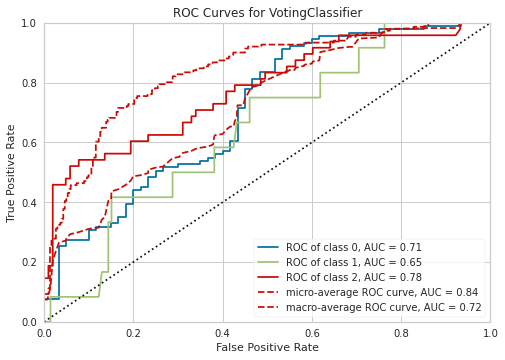

In [37]:
plot_model(blender)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


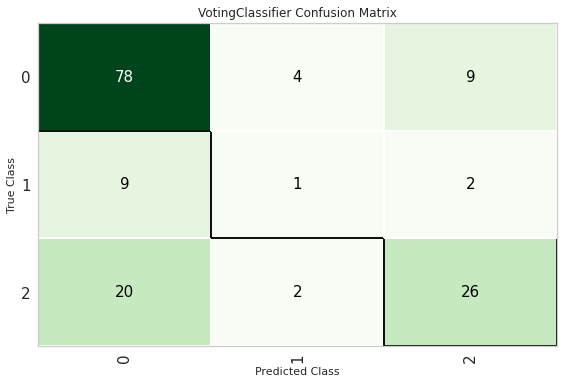

In [38]:
plot_model(blender, plot = 'confusion_matrix')

In [40]:
evaluate_model(blender)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [41]:
best = automl(optimize = 'Recall')
best

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

In [42]:
pred_holdouts = predict_model(blender)
pred_holdouts.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.6954,0.7267,0.4940,0.6740,0.6776,0.3800,0.3888


,id,amount_tsh,gps_height,longitude,latitude,population,construction_year,funder_Ces gmbh,funder_Danida,funder_Dhv,...,date_recorded_weekday_2,date_recorded_weekday_3,date_recorded_weekday_4,date_recorded_weekday_5,date_recorded_weekday_6,date_recorded_is_month_end_1,date_recorded_is_month_start_1,status_group,Label,Score
0,58838.0,0.0,0.0,32.916847,-2.849225,0.0,1997.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,functional,functional,0.6691
1,40592.0,50.0,2179.0,34.417694,-9.212646,75.0,2000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,non functional,non functional,0.7133
2,337.0,50.0,847.0,29.691828,-4.839442,450.0,2009.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,functional,functional needs repair,0.5259
3,4062.0,0.0,0.0,32.508465,-2.547705,0.0,1997.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,functional,functional,0.6059
4,59713.0,0.0,0.0,34.077427,-5.706033,0.0,1996.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,functional,functional,0.6194


In [44]:
predict_test = predict_model(best, data = Test)
predict_test

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,Label,Score
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0.0,...,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other,non functional,0.50
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0.0,...,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,non functional,0.67
2,17168,0.0,2013-02-01,Government Of Tanzania,1567,DWE,34.767863,-5.004344,Puma Secondary,0.0,...,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other,functional,0.52
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0.0,...,good,dry,dry,shallow well,shallow well,groundwater,other,other,non functional,0.97
4,49871,62.5,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0.0,...,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,0.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0.0,...,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,non functional,0.62
14846,18990,62.5,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0.0,...,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,non functional,0.48
14847,28749,0.0,2013-03-04,Government Of Tanzania,1476,DWE,34.739804,-4.585587,Bwawani,0.0,...,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe,functional,0.51
14848,33492,0.0,2013-02-18,Germany,998,DWE,35.432732,-10.584159,Kwa John,0.0,...,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,functional,0.53


In [45]:
save_model(best, model_name='best-model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='status_group',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
            

In [46]:
loaded_bestmodel = load_model('best-model')

Transformation Pipeline and Model Successfully Loaded


In [ ]:
#!pip install scikit-learn==0.23.2

In [46]:
Train_data = Train.iloc[:,:-1]
Train_target = Train.iloc[:,-1]


In [41]:
Train_data
Train_target

0            functional
1            functional
2            functional
3        non functional
4            functional
              ...      
59395        functional
59396        functional
59397        functional
59398        functional
59399        functional
Name: status_group, Length: 59400, dtype: object

In [22]:
from sklearn.model_selection import train_test_split

In [47]:
 X_train, X_test, y_train, y_test = train_test_split(Train_data, Train_target, test_size=0.33)


In [53]:
Train_pycaret = pd.DataFrame[X_train,y_train]


TypeError: 'type' object is not subscriptable

In [49]:
Train_pycaret.head()

AttributeError: 'list' object has no attribute 'head'

In [2]:
clf1 = setup(Train, target = 'status_group', session_id=123, log_experiment=True, experiment_name='pump')

NameError: name 'setup' is not defined